### Multiclass Classification using Logistic Regression

<img width= 200 height= 200 src="download.jpg" />

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
df = iris.frame
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
19,5.1,3.8,1.5,0.3,0
25,5.0,3.0,1.6,0.2,0
131,7.9,3.8,6.4,2.0,2
53,5.5,2.3,4.0,1.3,1
32,5.2,4.1,1.5,0.1,0
26,5.0,3.4,1.6,0.4,0
10,5.4,3.7,1.5,0.2,0
21,5.1,3.7,1.5,0.4,0


In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
df.target.unique()

array([0, 1, 2])

In [52]:
df['target_name'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data visualization and Exploration

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

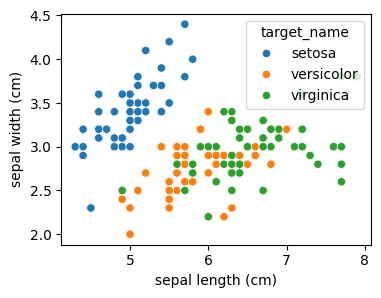

In [53]:
plt.figure(figsize=(4, 3))
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)',hue = 'target_name' )

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

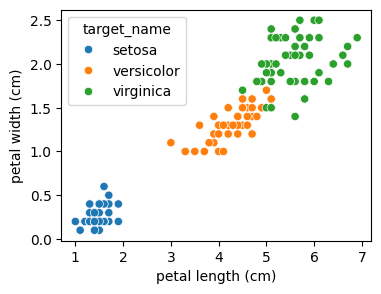

In [54]:
plt.figure(figsize=(4, 3))
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)',hue = 'target_name' )

In [55]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

### Model Training

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Model Evaluation: Accuracy score

In [57]:
model.score(X_test,y_test)

0.9777777777777777

In [58]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [59]:
y_test[:10].tolist()

[1, 2, 2, 0, 2, 1, 0, 1, 0, 1]

### Model Evaluation: Precision, Recall, F1-score

In [60]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Model Evaluation: Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(0.5, 1.0, 'Confusion Matrix')

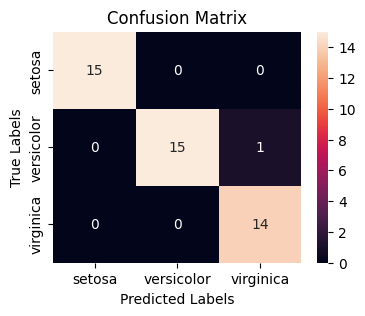

In [65]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm, xticklabels= iris.target_names, yticklabels= iris.target_names, annot= True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')